In [6]:
import pandas as pd

In [11]:
train_df = pd.read_csv('train.tsv',sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')
sub_df = pd.read_csv('sampleSubmission.csv')

In [12]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [13]:
test_df.head()


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [14]:
sub_df.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [15]:
#shape of all data
print("train - ",train_df.shape)
print("test - ",test_df.shape)
print("Submission - ",sub_df.shape)

train -  (156060, 4)
test -  (66292, 3)
Submission -  (66292, 2)


In [16]:
print(train_df.Sentiment.value_counts(normalize=True).sort_index())

0    0.045316
1    0.174760
2    0.509945
3    0.210989
4    0.058990
Name: Sentiment, dtype: float64


<AxesSubplot:>

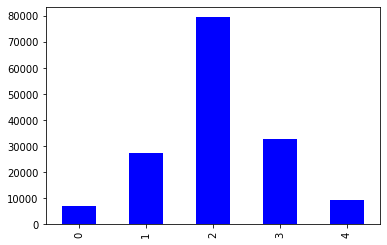

In [18]:
train_df.Sentiment.value_counts().sort_index().plot(kind='bar',color='blue')

<AxesSubplot:title={'center':'Pie chart of Sentiment Class'}, ylabel='Sentiment'>

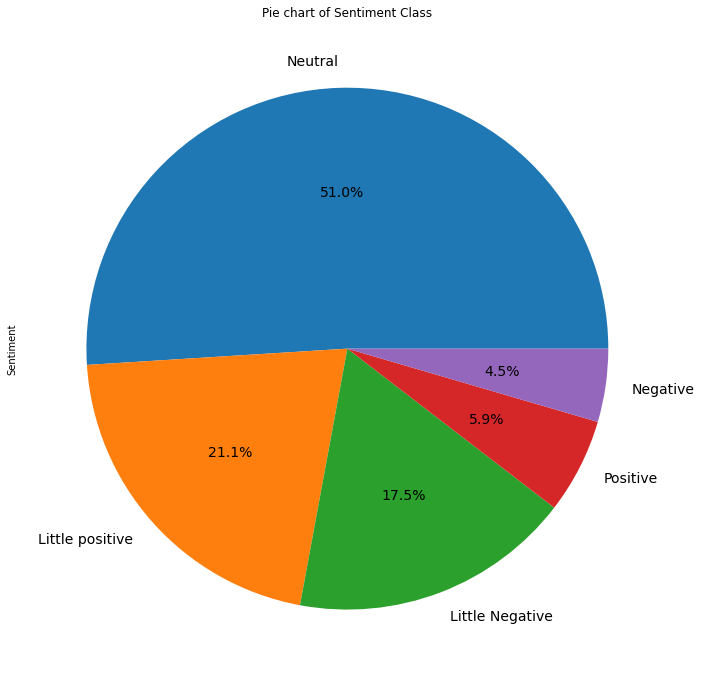

In [19]:
df2=train_df.copy(deep=True)
pie1=pd.DataFrame(df2['Sentiment'].replace(0,'Negative').replace(1,'Little Negative').replace(2,'Neutral').replace(3,'Little positive').replace(4,'Positive').value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Pie chart of Sentiment Class',y = 'Sentiment', 
          autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, figsize=(12,12))

In [20]:
#this will give us some random samples of our data
train_df.Phrase.sample(10).values

array(['the decay', 'A DOA',
       'offers an exploration that is more accurate than anything I have seen in an American film .',
       ', and sometimes dry', 'computer-generated feature cartoon',
       'this obscenely bad dark comedy ,', 'but watchable .',
       'Iraqi factory', 'the Miss Hawaiian Tropic Pageant', 'legion'],
      dtype=object)

In [21]:
train_df.Phrase

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [22]:
#some Phrases with 0-Sentiment
train_df[train_df.Sentiment == 0].Phrase.values[:10]

array(['would have a hard time sitting through this one',
       'have a hard time sitting through this one',
       'Aggressive self-glorification and a manipulative whitewash',
       'self-glorification and a manipulative whitewash',
       'Trouble Every Day is a plodding mess .', 'is a plodding mess',
       'plodding mess', 'could hate it for the same reason', 'hate it',
       'hate'], dtype=object)

In [23]:
#some Phrases with 1-Sentiment
train_df[train_df.Sentiment == 1].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'but none of which amounts to much of a story',
       'none of which amounts to much of a story',
       "Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",
       ', I suspect , would have a hard time sitting through this one .',
       'would have a hard time sitting through this one .',
       'a hard time sitting through this one', 'a hard time', 'hard time'],
      dtype=object)

In [25]:
#some Phrases with 2-Sentiment
train_df[train_df.Sentiment == 2].Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose',
       'demonstrating the adage'], dtype=object)

In [26]:
#some Phrases with 3-Sentiment
train_df[train_df.Sentiment == 3].Phrase.values[:10]

array(['good for the goose', 'good', 'amuses',
       'This quiet , introspective and entertaining independent',
       'quiet , introspective and entertaining',
       ', introspective and entertaining',
       'introspective and entertaining', 'introspective and',
       'is worth seeking .', 'fans'], dtype=object)

In [27]:
# some Phrases with 4-Sentiment
train_df[train_df.Sentiment == 4].Phrase.values[:10]

array(['This quiet , introspective and entertaining independent is worth seeking .',
       'quiet , introspective and entertaining independent',
       'entertaining', 'is worth seeking',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera',
       'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder',
       'thrilling',
       'A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .',
       'nearly epic',
       'rooted in a sincere performance by the title character undergoing midlife crisis .'],
      dtype=object)

In [28]:
train_df.shape,test_df.shape

((156060, 4), (66292, 3))

In [29]:
#import required libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [30]:
#setup for english language
stemmer  = SnowballStemmer(language='english')

In [31]:
#function to create tokenizer
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text)]

In [32]:
# test tokenize function
tokenize("Hey how are you going")

['hey', 'how', 'are', 'you', 'go']

In [33]:
#creating stopword for engilish language
eng_stopword = stopwords.words('english')

In [34]:
#here are some english stop words
', '.join(eng_stopword[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [35]:
#select some stopwords
selected_stopwords = eng_stopword[:115]

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
#creating vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words = selected_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [38]:
vectorizer.fit(train_df.Phrase)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'll', 'onc', 'ourselv', 're', 'themselv', 've', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7fb720cc8d08>, use_idf=True,
                vocabulary=None)

In [39]:
len(vectorizer.vocabulary_)

2000

In [43]:
vectorizer.get_feature_names()[:100]

['!',
 '$',
 '&',
 "'",
 "' `",
 "''",
 "'d",
 "'d expect",
 "'m",
 "'s",
 "'s -rrb-",
 "'s also",
 "'s best",
 "'s film",
 "'s go",
 "'s good",
 "'s hard",
 "'s just",
 "'s like",
 "'s movi",
 "'s no",
 "'s not",
 "'s noth",
 "'s perform",
 "'s so",
 "'s someth",
 "'s still",
 "'s too",
 "'s veri",
 "'s work",
 ',',
 ", '",
 ", 's",
 ', ,',
 ', `',
 ', ``',
 ', also',
 ', amus',
 ', becaus',
 ', charact',
 ', direct',
 ', doe',
 ', emot',
 ', especi',
 ', even',
 ', feel',
 ', film',
 ', funni',
 ', good',
 ', intellig',
 ', just',
 ', least',
 ', like',
 ', ll',
 ', love',
 ', make',
 ', movi',
 ', much',
 ", n't",
 ', never',
 ', no',
 ', not',
 ', often',
 ', one',
 ', onli',
 ', rather',
 ', re',
 ', realli',
 ', should',
 ', so',
 ', sometim',
 ', still',
 ', though',
 ', time',
 ', too',
 ', ultim',
 ', veri',
 ', visual',
 ', well',
 ', will',
 ', would',
 ', yet',
 '-',
 '- ,',
 '--',
 "-- 's",
 '-- ,',
 '-lrb-',
 '-lrb- -rrb-',
 '-rrb-',
 '-rrb- ,',
 '.',
 ". '",
 '. ``',
 '.

In [44]:
train_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [45]:
%%time
inputs = vectorizer.transform(train_df.Phrase)

CPU times: user 37.3 s, sys: 35.3 ms, total: 37.4 s
Wall time: 37.4 s


In [46]:
inputs.shape

(156060, 2000)

In [47]:
inputs.toarray()[0][:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10508068, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [48]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [49]:
%%time
test_inputs = vectorizer.transform(test_df.Phrase)

CPU times: user 15 s, sys: 15.8 ms, total: 15 s
Wall time: 15 s


In [50]:
test_inputs.shape

(66292, 2000)

In [51]:
#take train size to split test data from training data
TRAIN_SIZE = 100_000

In [52]:
#creating inputs and targets for train data
train_inputs = inputs[:TRAIN_SIZE]
train_targets = train_df.Sentiment[:TRAIN_SIZE]

In [53]:
#checking the shape of targets to know the data range is samem or not
train_inputs.shape,train_targets.shape

((100000, 2000), (100000,))

In [54]:
#creating inputs and targets for validation data
val_inputs = inputs[TRAIN_SIZE:]
val_targets = train_df.Sentiment[TRAIN_SIZE:]

In [55]:
#checking the shape of targets to know the data range is samem or not
val_inputs.shape,val_targets.shape

((56060, 2000), (56060,))

In [59]:
#Model-1 Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 15.2 s, sys: 702 ms, total: 15.9 s
Wall time: 5.35 s


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
train_preds = model.predict(train_inputs)

In [62]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [63]:
train_preds

array([3, 2, 2, ..., 1, 2, 2])

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
#accuracy of our prdictions
print("Accuracy Score of prediction on training data-->",accuracy_score(train_targets,train_preds))

Accuracy Score of prediction on training data--> 0.64231


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
#try with test(validation) data
val_pred_1 = model.predict(val_inputs)

In [68]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_1))

Accuracy Score of prediction on validation data--> 0.5791473421334284


In [69]:
#classificatiopn report for model predictions
from sklearn.metrics import classification_report
report = classification_report(val_targets,val_pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.11      0.17      2619
           1       0.47      0.30      0.37     10342
           2       0.63      0.85      0.72     27799
           3       0.49      0.41      0.45     11835
           4       0.52      0.17      0.26      3465

    accuracy                           0.58     56060
   macro avg       0.50      0.37      0.39     56060
weighted avg       0.55      0.58      0.54     56060



In [70]:
small_df = train_df.sample(20)

In [71]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
15118,15119,650,a buck or so,2
33134,33135,1553,with fantasy mixing with reality and actors pl...,2
32564,32565,1527,"is a light , fun cheese puff of a movie .",4
14538,14539,625,ahead,2
27837,27838,1278,Auto,2
154411,154412,8440,from a leaden script,2
114469,114470,6089,in a movie theatre for some time,2
132783,132784,7159,with such enervating determination in Venice\/...,2
76245,76246,3913,A charming and funny story of clashing culture...,4
77677,77678,3994,should come with the warning `` For serious fi...,3


In [72]:
#transform small df into vectors
small_inputs = vectorizer.transform(small_df.Phrase)

In [73]:
small_preds = model.predict(small_inputs)

In [74]:
small_preds

array([2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 3, 1, 2, 1, 2, 2, 3, 2])

In [75]:
small_df.Sentiment

15118     2
33134     2
32564     4
14538     2
27837     2
154411    2
114469    2
132783    2
76245     4
77677     3
7583      2
34092     1
99901     3
97331     1
90492     3
10969     1
71341     4
135036    2
72530     2
87801     2
Name: Sentiment, dtype: int64

In [76]:
test_preds = model.predict(test_inputs)
test_preds

array([3, 2, 2, ..., 2, 2, 2])

In [77]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [78]:
sub_df.Sentiment = test_preds
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [79]:
#Model-2 --> Decision Trees Model
from sklearn import tree
model_2 = tree.DecisionTreeClassifier()
model_2.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
train_pred_2 = model_2.predict(train_inputs)

In [81]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [82]:
train_pred_2

array([1, 2, 2, ..., 3, 2, 2])

In [83]:
print("Accuracy Score of prediction on Training data-->",accuracy_score(train_targets,train_pred_2))

Accuracy Score of prediction on Training data--> 0.83039


In [84]:
#classificatiopn report for model predictions
report = classification_report(train_targets,train_pred_2)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4453
           1       0.82      0.71      0.76     16931
           2       0.82      0.94      0.87     51783
           3       0.87      0.70      0.77     21092
           4       0.95      0.68      0.79      5741

    accuracy                           0.83    100000
   macro avg       0.85      0.77      0.80    100000
weighted avg       0.84      0.83      0.83    100000



In [85]:
val_pred_2 = model_2.predict(val_inputs)
val_pred_2 

array([1, 1, 2, ..., 2, 2, 2])

In [86]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets,val_pred_2))

Accuracy Score of prediction on validation data--> 0.518926150552979


In [87]:
test_preds_2 = model_2.predict(test_inputs)
test_preds_2

array([2, 2, 2, ..., 2, 2, 1])

In [88]:
sub_df.Sentiment = test_preds_2
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [89]:
#Model-3 --> Naive bayes classifier
#split data for naive b 
from sklearn.model_selection import train_test_split
train_inputs_nb, val_inputs_nb, train_targets_nb, val_targets_nb = train_test_split(inputs, train_df['Sentiment'], test_size=0.25, random_state=5)

In [90]:
#using Naive bayes classifier for prediction
from sklearn.naive_bayes import MultinomialNB

In [91]:
model_3 = MultinomialNB()

In [92]:
model_3.fit(train_inputs_nb,train_targets_nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
train_pred_3 = model_3.predict(train_inputs_nb)

In [94]:
train_pred_3

array([2, 2, 3, ..., 2, 2, 1])

In [95]:
print("Accuracy Score of prediction on Training data-->",accuracy_score(train_targets_nb,train_pred_3))

Accuracy Score of prediction on Training data--> 0.5760604895552992


In [96]:
#classificatiopn report for model predictions
report = classification_report(train_targets_nb,train_pred_3)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.04      0.07      5298
           1       0.54      0.16      0.25     20460
           2       0.58      0.95      0.72     59684
           3       0.55      0.28      0.37     24671
           4       0.72      0.07      0.12      6932

    accuracy                           0.58    117045
   macro avg       0.62      0.30      0.31    117045
weighted avg       0.58      0.58      0.50    117045



In [97]:
val_pred_3 = model_3.predict(val_inputs_nb)
val_pred_3

array([2, 2, 2, ..., 2, 2, 2])

In [98]:
print("Accuracy Score of prediction on validation data-->",accuracy_score(val_targets_nb,val_pred_3))

Accuracy Score of prediction on validation data--> 0.5673971549404075


In [99]:
test_pred_3 = model_3.predict(test_inputs)
test_pred_3

array([2, 2, 2, ..., 2, 2, 2])

In [100]:
print('Accuracy for Logistic Regression:'+str('{:04.2f}'.format(accuracy_score(val_targets,val_pred_1)*100))+'%')
print('Accuracy for Decision Trees Model:'+str('{:04.2f}'.format(accuracy_score(val_targets,val_pred_2)*100))+'%')
print('Accuracy for Naive bayes classifier:'+str('{:04.2f}'.format(accuracy_score(val_targets_nb,val_pred_3)*100))+'%')

Accuracy for Logistic Regression:57.91%
Accuracy for Decision Trees Model:51.89%
Accuracy for Naive bayes classifier:56.74%


In [101]:
print("Best Model : Logistic Regression")

Best Model : Logistic Regression
